In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Alexander\Documents\csvs\movies.csv')

In [56]:
# We niw display this Data in order to look at it

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162
7445,529,5,0,2019,180,8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181
3045,6812,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194
6663,5076,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# looks like we dont have  missing values.

# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [9]:
# change datatype for budget and gross you can skip this one if you like
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce').fillna(0).astype('int64')

In [10]:
# now if we check the data will have the following dataset
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object


In [57]:
#removing the NaN Values
df.dropna()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162
7445,529,5,0,2019,180,8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181
3045,6812,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194
6663,5076,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149


In [14]:
df.sort_values(by =['gross'], inplace = False, ascending =False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


In [15]:
# let us now drop all

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120


In [16]:
df.sort_values(by =['gross'], inplace = False, ascending =False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


In [28]:
#removing the NaN Values again
df = df.dropna()
df = df.sort_values(by =['gross'], inplace = False, ascending =False)

In [ ]:
# We now have clean Data so we can start our analysis
# Some Assumption taken is that budget and company has some high correlation in relation to gross Revenue for most movies
# this is not fact it is an educated gauss 

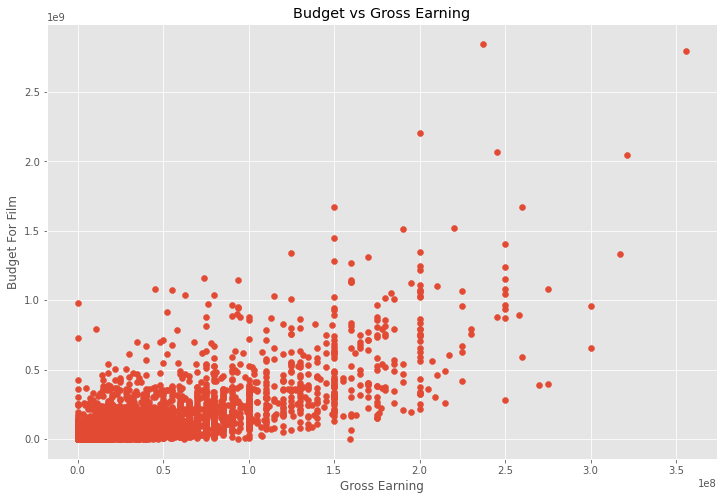

In [55]:
# We now going to do a Scatter Plot #
# This will be for budget Vs gross

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget For Film')
plt.show()

In [30]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


<AxesSubplot:xlabel='budget', ylabel='gross'>

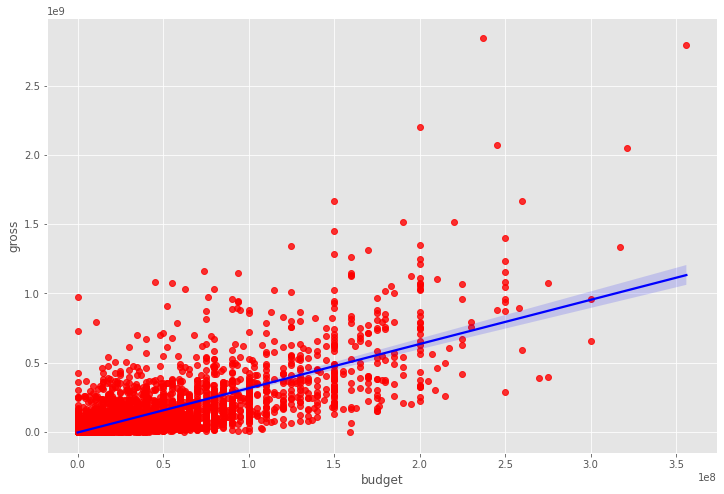

In [32]:
#plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data  = df, scatter_kws={"color": "red"}, line_kws ={"color": "blue"})

In [34]:
 # Now We Start Looking at correlaton
 df.corr(method = 'pearson')                         # three types of correlation methods commonly used are Pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.102175,0.226837,0.314867,0.264663,0.119607
score,0.102175,1.000000,0.411938,0.056721,0.188278,0.400518
votes,0.226837,0.411938,1.000000,0.485280,0.632990,0.308908
budget,0.314867,0.056721,0.485280,1.000000,0.750541,0.269169
gross,0.264663,0.188278,0.632990,0.750541,1.000000,0.244585
runtime,0.119607,0.400518,0.308908,0.269169,0.244585,1.000000


In [ ]:
#looking at the Data Above another enlighting fact is oberved that Votes has a high correlation  with Gross Earning 
# Another point is that the Data above only contains correlatioon for numerical Values we will handle this later.

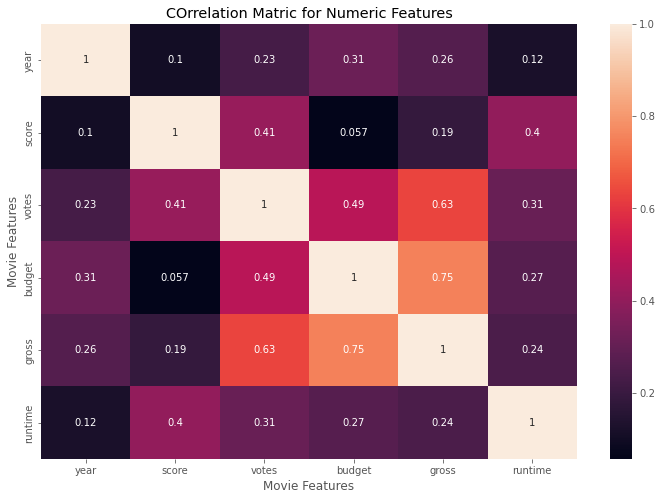

In [43]:
correlation_matrix = df.corr(method = 'pearson')  
sns.heatmap(correlation_matrix , annot=True)

plt.title('COrrelation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [44]:
# COMPANY vs GROSS 
# But compnay is not numeric so we need to change the Value

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [47]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162
7445,529,5,0,2019,180,8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181
3045,6812,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194
6663,5076,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149


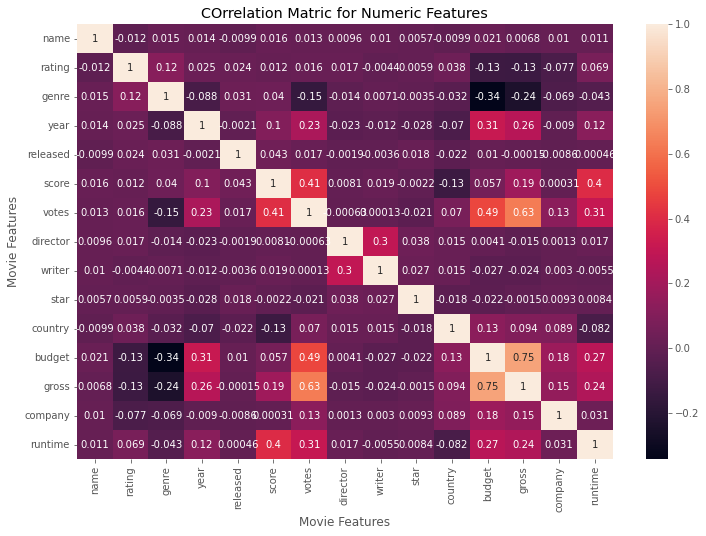

In [48]:
# now let us try to do a correlation plot with all the columns and our forcus being on the values for the Company
correlation_matrix = df_numerized.corr(method = 'pearson')  
sns.heatmap(correlation_matrix , annot=True)

plt.title('COrrelation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [49]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011926,0.015273,0.013532,-0.009912,0.016160,0.013176,0.009608,0.010240,0.005685,-0.009931,0.020833,0.006813,0.010070,0.011022
rating,-0.011926,1.000000,0.117582,0.024963,0.024328,0.011563,0.016093,0.017204,-0.004418,0.005904,0.037727,-0.126813,-0.128904,-0.076808,0.069069
genre,0.015273,0.117582,1.000000,-0.088343,0.030695,0.040283,-0.148349,-0.013510,0.007126,-0.003532,-0.031558,-0.342085,-0.240830,-0.068678,-0.043496
year,0.013532,0.024963,-0.088343,1.000000,-0.002144,0.102175,0.226837,-0.022760,-0.012146,-0.027682,-0.070200,0.314867,0.264663,-0.009019,0.119607
released,-0.009912,0.024328,0.030695,-0.002144,1.000000,0.043232,0.016893,-0.001869,-0.003640,0.018023,-0.022131,0.009975,-0.000151,-0.008573,0.000455
score,0.016160,0.011563,0.040283,0.102175,0.043232,1.000000,0.411938,0.008068,0.018887,-0.002199,-0.130146,0.056721,0.188278,0.000309,0.400518
votes,0.013176,0.016093,-0.148349,0.226837,0.016893,0.411938,1.000000,-0.000628,0.000127,-0.020978,0.069565,0.485280,0.632990,0.129593,0.308908
director,0.009608,0.017204,-0.013510,-0.022760,-0.001869,0.008068,-0.000628,1.000000,0.297451,0.037570,0.015246,0.004141,-0.015028,0.001337,0.017332
writer,0.010240,-0.004418,0.007126,-0.012146,-0.003640,0.018887,0.000127,0.297451,1.000000,0.026591,0.015011,-0.027080,-0.023873,0.003041,-0.005499
star,0.005685,0.005904,-0.003532,-0.027682,0.018023,-0.002199,-0.020978,0.037570,0.026591,1.000000,-0.017623,-0.021928,-0.001471,0.009317,0.008422


In [51]:
correlation_mat = df_numerized.corr()
correlation_pairs = correlation_mat.unstack()
correlation_pairs

name     name        1.000000
         rating     -0.011926
         genre       0.015273
         year        0.013532
         released   -0.009912
                       ...   
runtime  country    -0.081613
         budget      0.269169
         gross       0.244585
         company     0.030838
         runtime     1.000000
Length: 225, dtype: float64

In [53]:
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

genre    budget    -0.342085
budget   genre     -0.342085
genre    gross     -0.240830
gross    genre     -0.240830
genre    votes     -0.148349
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [54]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

# Now we check the values with the highest correlation 
high_corr

gross     votes       0.632990
votes     gross       0.632990
budget    gross       0.750541
gross     budget      0.750541
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Votes And Budget have the highest correlation to the gross Earnings 
#Company does not have a high correlation with Gross.